<a href="https://colab.research.google.com/github/irravasyuk/SQL_2/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%B8%D0%B9_%D0%B7%D1%96%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1

Зробіть сегментацію для наступного зображення https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/cat.jpg

* завантежте модель `deeplabv3_resnet50` та відповідні ваги `DeepLabV3_ResNet50_Weights` [документація](https://pytorch.org/vision/stable/models/generated/torchvision.models.segmentation.deeplabv3_resnet50.html#deeplabv3-resnet50)
* застосуйте `transforms.Resize` до зображення
* застосуйте `transforms` з ваг до зображення
* змініть розмірність зображення на потрібну
* отримайте результат моделі
* застосуйте `draw_segmentation_masks`

In [1]:
import torch
from torchvision.io.image import read_image
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights
from torchvision import transforms

img = read_image("/content/cat.jpg")

img = transforms.Resize((520, 520))(img)

weights = DeepLabV3_ResNet50_Weights.DEFAULT
model = deeplabv3_resnet50(weights=weights)
model.eval()

preprocess = weights.transforms(resize_size=None)

batch = preprocess(img)
batch = batch.unsqueeze(0)

with torch.no_grad():
  prediction = model(batch)["out"]

masks = prediction.argmax(dim=1)
mask = masks[0]

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:01<00:00, 148MB/s]


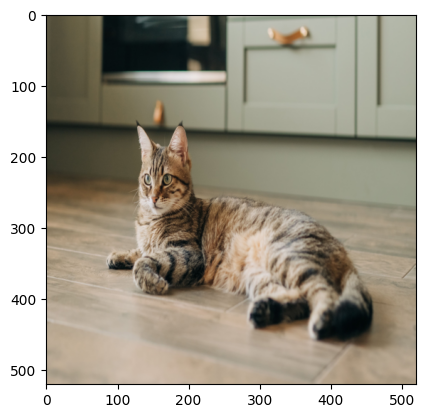

In [2]:
import matplotlib.pyplot as plt

plt.imshow(img.permute(1, 2, 0))

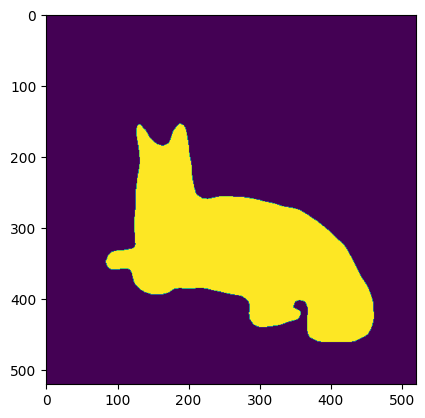

In [3]:
plt.imshow(mask)

In [4]:
mask.unique()

tensor([0, 8])

In [5]:
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
class_to_idx

{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

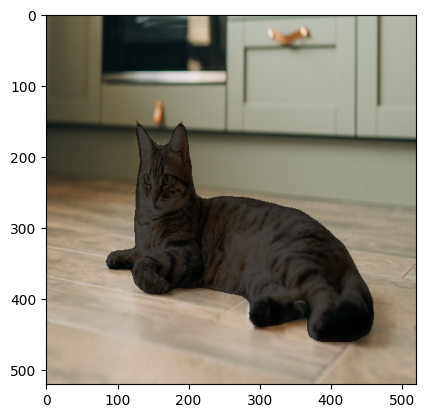

In [6]:
from torchvision.utils import draw_segmentation_masks

cat_mask = mask == class_to_idx['cat']

masked_img = draw_segmentation_masks(img, cat_mask, alpha=0.7)

plt.imshow(masked_img.permute(1, 2, 0))

In [7]:
img.shape

torch.Size([3, 520, 520])

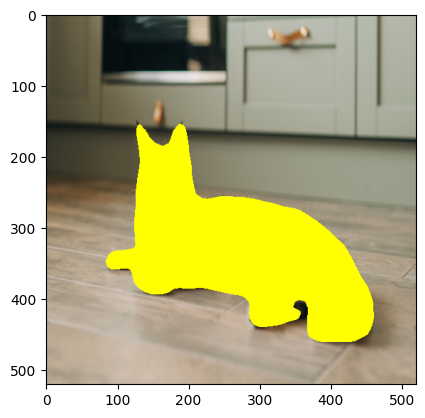

In [8]:
masked_img = img.clone()
masked_img = masked_img.to(int)

yellow_pixel = torch.tensor([255, 255, 0])
masked_img[:, cat_mask] = yellow_pixel.view(-1, 1)

plt.imshow(masked_img.permute(1, 2, 0))

# Завдання 2

Проведіть виявлення об'єктів на даному зображенні https://www.thespruce.com/thmb/o_zAsNy0xWNWeq9xfWwAo6fhueo=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/SPR-luxury-kitchens-5211364-hero-688d716970544978bc12abdf17ce6f83.jpg

* Підберіть різні параметри `conf` та `iou` щоб подивитись на результат роботи моделі
* За допомогою параметра `classes` визначіть на зображенні лише:
  1. стільці
  2. бокали для вина
  3. рослини та вази

In [9]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.0/869.0 kB 22.6 MB/s eta 0:00:00


In [44]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

class_ids = [56, 40, 58, 75]

results = model.predict(source='https://ultralytics.com/images/flat.jpg',
                        conf = 0.3,
                        iou=0.5,
                        imgsz = 1000)

result = results[0]


WARNING ⚠️ imgsz=[1000] must be multiple of max stride 32, updating to [1024]
Found https://ultralytics.com/images/flat.jpg locally at flat.jpg
image 1/1 /content/flat.jpg: 704x1024 4 wine glasss, 2 bowls, 3 chairs, 3 potted plants, 2 vases, 630.7ms
Speed: 9.3ms preprocess, 630.7ms inference, 2.7ms postprocess per image at shape (1, 3, 704, 1024)


In [45]:
img_with_detection = result.plot(filename='result.png', save=True)

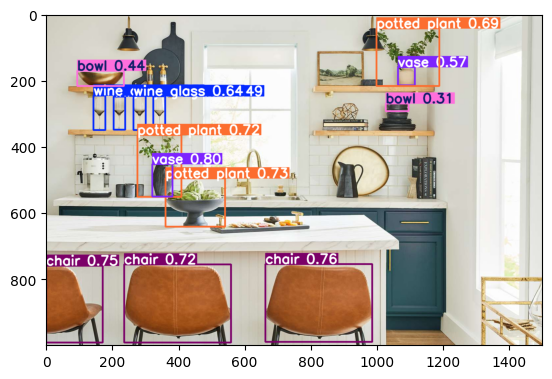

In [46]:
plt.imshow(img_with_detection[:, :, ::-1])
plt.show()